In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

### задача 8

In [3]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


возьмём значения кислотности и отсортируем их:

In [23]:
X = sorted(df['pH'].values)
n = len(X)

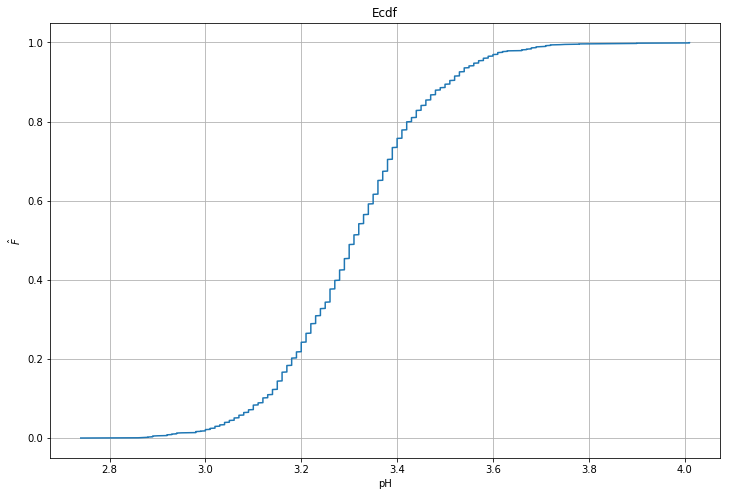

In [30]:
fig = plt.figure(figsize=(12,8))
probs = np.arange(n)/n
plt.plot(X, probs)
plt.xlabel('pH')
plt.ylabel('$\hat{F}$')
plt.title("Ecdf")
plt.grid()
plt.show()

https://en.wikipedia.org/wiki/Dvoretzky–Kiefer–Wolfowitz_inequality

In [37]:
alpha = 0.05
epsilon = np.sqrt( np.log(2/alpha) / (2*n) )

probs_u = np.array(probs) + epsilon
probs_u = np.where(probs_u > 1, 1, probs_u)
probs_l = np.array(probs) - epsilon
probs_l = np.where(probs_l < 0, 0, probs_l)

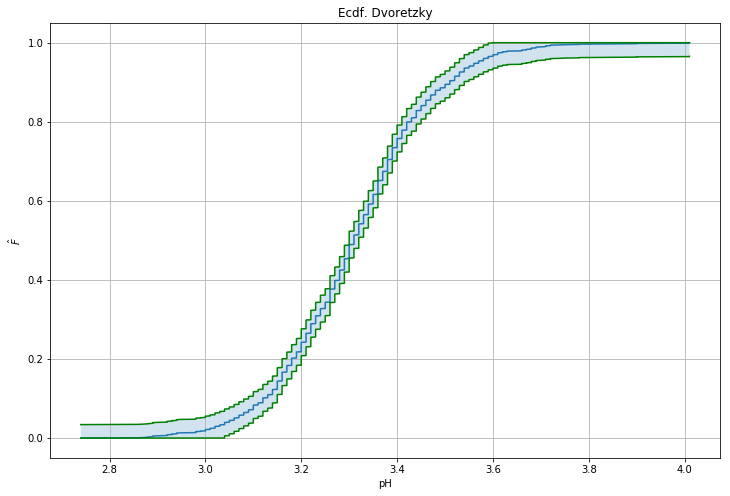

In [41]:
fig = plt.figure(figsize=(12,8))

plt.plot(X, probs)
plt.plot(X, probs_u, c='green')
plt.plot(X, probs_l, c='green')
plt.fill_between(X, probs_l, probs_u, alpha=0.2)

plt.xlabel('pH')
plt.ylabel('$\hat{F}$')
plt.title("Ecdf. Dvoretzky")
plt.grid()
plt.show()

мы построили доверительные интервалы на основе неравенства Дворецкого.

аналогично мы можем построить ассимптотически нормальные доверительные интервалы. Нужно только пересчитать отклонение:

Для каждой точки мы можем на основе оценки вероятности найти дисперсию и se:

$$D = \frac{\hat F (1 - \hat F)}{n}, \quad    se = \sqrt{D}$$

In [48]:
standrd_error = np.sqrt(probs * (1 - probs) / n)
epsilon = stat.norm.ppf(1 - alpha/2) * standrd_error

probs_u = np.array(probs) + epsilon
probs_u = np.where(probs_u > 1, 1, probs_u)
probs_l = np.array(probs) - epsilon
probs_l = np.where(probs_l < 0, 0, probs_l)

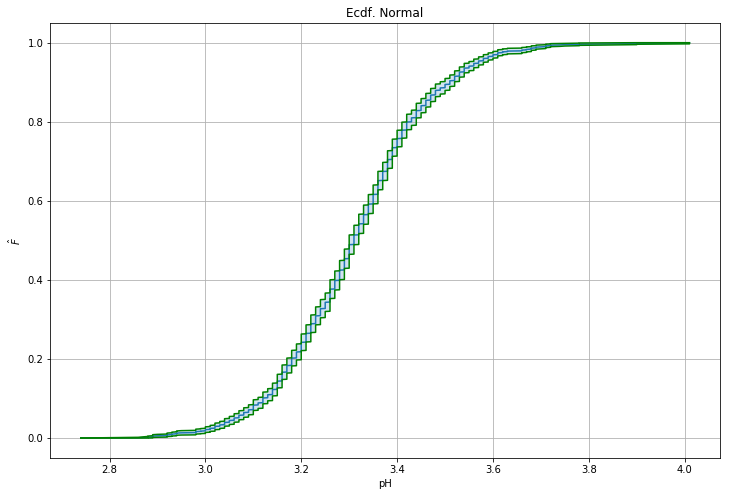

In [49]:
fig = plt.figure(figsize=(12,8))

plt.plot(X, probs)
plt.plot(X, probs_u, c='green')
plt.plot(X, probs_l, c='green')
plt.fill_between(X, probs_l, probs_u, alpha=0.2)

plt.xlabel('pH')
plt.ylabel('$\hat{F}$')
plt.title("Ecdf. Normal")
plt.grid()
plt.show()

Оценим значение функционала:

In [68]:
def Ecdf(x):
    return (np.where(np.array(X) <= x, 1, 0).sum()) / n

def se(f):
    return np.sqrt(f*(1-f)/n)

Оценку функционала мы можем найти по Ecdf (просто написать разность). 

При этом можно рассмотреть случайное событие: pH попало в интересующий нас интервал. Для этого события мы получили оценку вероятности. Тогда оценку стандартного отклонения мы получаем из аналитических результатов для схемы испытаний Бернулли. В итоге получаем:

In [70]:
x_l, x_u = 3.4, 3.5
T = Ecdf(x_u) - Ecdf(x_l)
seT = se(T)

print('T = {}, se = {}'.format(T, seT))

T = 0.1369606003752346, se = 0.008597831013481914


In [71]:
epsilon = stat.norm.ppf(1 - alpha/2) * seT
print('95% доверительны интервал для T : ({}, {})'.format(T-epsilon, T+epsilon))

95% доверительны интервал для T : (0.12010916124364854, 0.15381203950682068)


### Задача 9

In [72]:
df = pd.read_csv('WaterTreatment.csv')
df.describe()

,sediment,reduced_microorganism
count,380.000000,380.000000
mean,0.036132,0.686842
std,0.200343,0.464389
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.010000,1.000000
75%,0.020000,1.000000
max,3.500000,1.000000


In [73]:
df.head()

,sediment,reduced_microorganism
0,0.00,1.0
1,0.03,1.0
2,0.02,1.0
3,3.50,0.0
4,0.02,1.0


In [74]:
df_experiment = df[df['reduced_microorganism'] == 1]
df_control = df[df['reduced_microorganism'] == 0]

Напишем функцию, которая будет возвращать оценку среднего, а так же оценку для стандартного отклонения средней величины. (подумать над несмещённостью этой оценки)

In [82]:
def GetWaterMeanAndSe(dataframe):
    X = np.array(dataframe['sediment'].values)
    return X.mean(), X.std() / (X.size ** 0.5)

In [83]:
exp_mean, exp_std = GetWaterMeanAndSe(df_experiment)
con_mean, con_std = GetWaterMeanAndSe(df_control)

print('experiment mean = {}, std = {}'.format(exp_mean, exp_std))
print('control mean = {}, std = {}'.format(con_mean, con_std))

experiment mean = 0.013793103448275862, std = 0.0010474904323954871
control mean = 0.08512605042016805, std = 0.03224238790038352


На основе этих данных мы можем записать значения функционала разности.
На лекции было показано, что в этом случае (при независимости событий) мы можем в качестве оценки стандартного отклонения использовать корень из суммы квадратов. В итоге получаем:

In [84]:
T = exp_mean - con_mean
seT = np.hypot(exp_std, con_std)

print('functional mean = {}, std = {}'.format(T, seT))

functional mean = -0.07133294697189219, std = 0.032259398843201614


In [85]:
def GetInterval(T, se, alpha=0.05):
    epsilon = stat.norm.ppf(1 - alpha/2) * se
    return T-epsilon, T+epsilon

print('95% interval : {}'.format(GetInterval(T, seT, 0.05)))
print('99% interval : {}'.format(GetInterval(T, seT, 0.01)))

95% interval : (-0.13456020686748044, -0.008105687076303936)
99% interval : (-0.1544276518270824, 0.01176175788329803)


#### Вывод

- Мы видим, что в 95% интервал не попадает нулевое значение. Следовательно гипотеза различия средних значений может быть принята на уровне значимости в 95%

- Для интервала в 99% ноль не исключён. То есть мы не можем по предоставленным данным утверждать различие средних значений со значимостью 99%.

### Задача 10

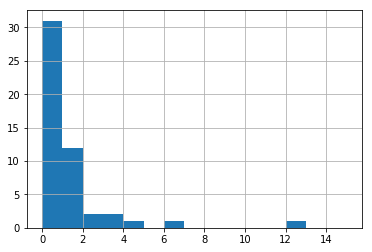

In [205]:
n = 50
X = np.exp(np.random.normal(size=n))

plt.hist(X, bins=15, range=(0,15))
plt.grid()
plt.show()

In [211]:
Skewness = stat.skew(X)
Skewness

3.830982107004671

In [207]:
def skewness(X):
    mean, se = X.mean(), X.std()
    return ((X - mean) ** 3).mean() / se ** 3

skewness(X)

3.8309821070046715

In [208]:
b = 100000
Xb = np.random.choice(X, (b, n), replace=True)

Tn = stat.skew(Xb, axis=1)

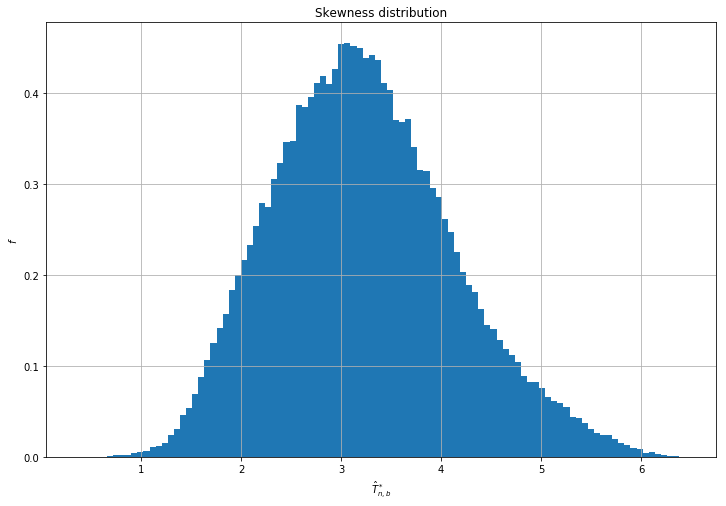

In [209]:
fig = plt.figure(figsize=(12,8))

plt.hist(Tn, density=True, bins=100)
plt.title('Skewness distribution')
plt.ylabel('$f$')
plt.xlabel('$\hat{T}_{n,b}^*$')
plt.grid()
plt.show()

#### Построение доверительных интервалов

И сравнение с теоретическим значением для логнормального распределения

In [213]:
mean, se = Tn.mean(), Tn.std()
print('bootstrap skewness mean = {}, std = {}'.format(mean, se))

bootstrap skewness mean = 3.2279902292317746, std = 0.9009621981332638


1) построим нормальный интервал как это делали ранее

In [214]:
print('95% interval is : {}'.format(GetInterval(Skewness, se, alpha=0.05)))

95% interval is : (2.0651286472314334, 5.596835566777909)


2) Для двух других способов нам необходимо построить распределение оценок на бутстрепных выборках и найти границы перцентилей.

Тогда для центрального интервала мы получаем 
$$ (2\hat T - \hat T_{1-\alpha/2}^{*}, 2\hat T - \hat T_{\alpha/2}^{*}) $$

In [254]:
lower, upper = np.percentile(Tn, 100 * alpha/2), np.percentile(Tn, 100 - 100 * alpha/2)
print('95% interval is : {}'.format((2 * Skewness - upper, 2 * Skewness - lower)))

95% interval is : (2.479210773568794, 6.009732180649894)


3) Для метода перцентилей имеем: 
$$ (\hat T_{\alpha/2}^{*}, \hat T_{1-\alpha/2}^{*}) $$

In [255]:
print('95% interval is : {}'.format((lower, upper)))

95% interval is : (1.6522320333594482, 5.182753440440548)


In [252]:
theoretical_skewness = (np.exp(1) + 2) * (np.exp(1) - 1) ** 0.5
print('theoretical skewness = {}'.format(theoretical_skewness))

theoretical skewness = 6.184877138632554


#### Анализ полученных результатов

Мы видим, что известная теоретическая оценка для данного распределения не попадает в представленные нами доверительные интервалы. И этому нужно дать какое-то объяснение. Т.к. заявление о 95% интервале никак не соотносится с тем, что при множестве повторных экспериментов мы стабильно попадаем "мимо цели"

В качестве гипотезы можно сказать, что мы используем сильно смещённую оценку. Давайте проведём серию экспериментов, когда мы будем из распределения выбирать n элементов, по этой выборке строить skewness, повторять эксперимент несколько раз. При этом выделим среднее значение полученного коэффициента ассиметрии, а так же границы перцентильных интервалов. Такие эксперименты проведём для нескольких различных значени размера выборки. Для удобства результаты мы будем нормировать на теоретическое значение коэффициента ассиметрии представленного распределения. Эти данные позволят определить характерный порядок смещения оценки.

In [224]:
def GetSkewnessStats(n=50, s=10000, alpha=5):
    Xskstat = np.exp(np.random.normal(size=(s,n)))
    T = stat.skew(Xskstat, axis=1)
    mean = T.mean()
    lower, upper = np.percentile(T, alpha/2), np.percentile(T, 100 - alpha/2)
    return mean, lower, upper

In [238]:
n_samples = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

result = []
for n in n_samples:
    result.append(GetSkewnessStats(n=n))

In [242]:
result = np.array(result)
skew_mean = result[..., 0]
skew_lower = result[..., 1]
skew_upper = result[..., 2]

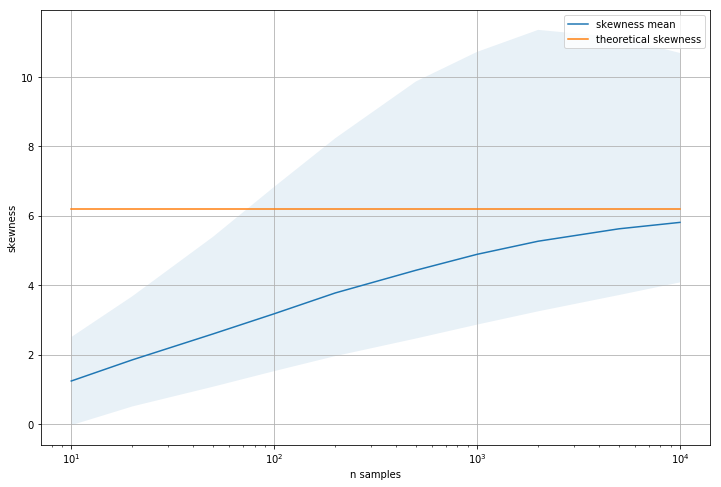

In [250]:
plt.figure(figsize=(12,8))
plt.fill_between(n_samples, skew_lower, skew_upper, alpha=0.1)
plt.plot(n_samples, skew_mean, label='skewness mean')
plt.plot([min(n_samples), max(n_samples)], [theoretical_skewness] * 2, label='theoretical skewness')
plt.xlabel('n samples')
plt.ylabel('skewness')
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

На графике ВНЕЗАПНО оказывается, что оценка коэффициента ассиметрии очень сильно смещена. И для n=50 мы как раз и не должны попадать в теоретическое значение, если не учитываем эко самое смещение. А вот в смещённые значения мы как раз прекрасно попадаем.

Резюмировать можно так: что считали, то и получили. С очень хорошим согласованием. Просто нужно отдавать себе отчёт что именно мы считаем. И то, что иногда значение смещённой оценки (которую мы и вычисляем) может отличаться от истинного значения более чем вдвое.

Для наглядности приведём вычисленное методом Монте-Карло значение смещённой оценки:

In [251]:
mean, lower, upper = GetSkewnessStats(s=1000000)
print('for 50 samples:\n biased skewness = {}, biased interval = ({}, {})'.format(mean, lower, upper))

for 50 samples:
 biased skewness = 2.6115390647593606, biased interval = (1.1008968032779893, 5.401807626304832)


#### Выводы

- Бутстреп позволяет по данной выборке оценить параметры распределения. И это здорово, особенно когда получение новых данных для нас дорого или вообще невозможно.

- При этом нужно помнить, что мы не получаем НОВЫЕ данные, а пользуемся только старыми. Так это может приводить (и приводит!) к сильному смещению оценок. В общем-то это смещение можно компенсировать в том случае, если нам известна некоторая информация о природе распределения.

- Нельзя тупо высчитывать результат! Всегда нужно иметь в виду что и как мы получаем. И анализировать возможные косяки...

### Задача 11

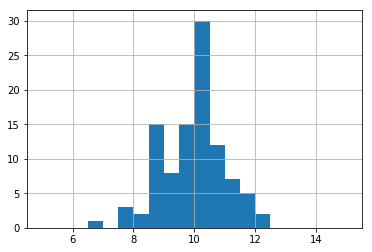

In [264]:
n = 100
mu = 10
X = np.random.normal(loc=mu, size=n)

plt.hist(X, bins=20, range=(5,15))
plt.grid()
plt.show()

In [265]:
T = np.exp(X.mean())
print('Точечная оценка функционала : {}'.format(T))

Точечная оценка функционала : 21742.60193548546


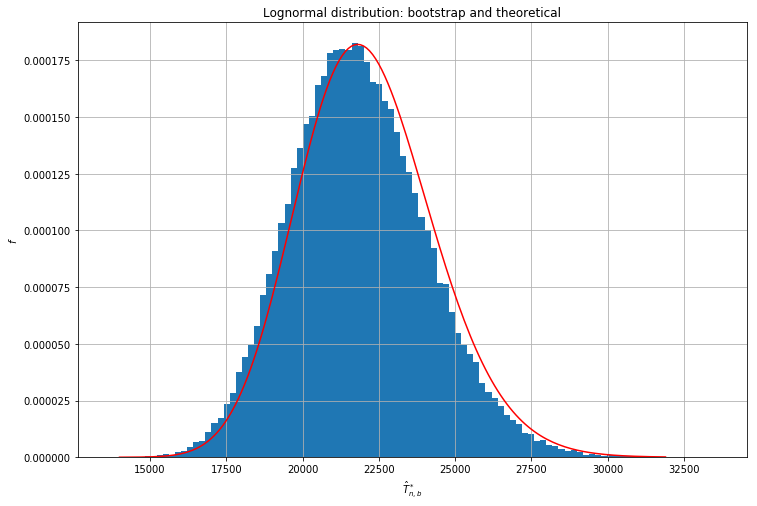

In [275]:
Xb = np.random.choice(X, (b, n), replace=True)
Tn = np.exp(np.mean(Xb, axis=1))

plt.figure(figsize=(12,8))
plt.hist(Tn, density=True, bins=100)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
x_val = np.arange(14000, 32000, 100)
lognorm_pdf = stat.lognorm.pdf(x_val, s=n ** -0.5, scale=np.exp(mu))
plt.plot(x_val, lognorm_pdf, color='red')

plt.title('Lognormal distribution: bootstrap and theoretical')
plt.ylabel('$f$')
plt.xlabel('$\hat{T}_{n,b}^*$')
plt.grid()
plt.show()

Мы видим, что бутстрепное распределение незначительно смещено по сравнению с теоретическим графиком логнормального распределения. В дальнейшем произведём оценку результата по бутстрепу и сравним с теоретическими значениями.

https://en.wikipedia.org/wiki/Log-normal_distribution

In [267]:
se = Tn.std()
print('standard error for T : {}'.format(se))

standard error for T : 2213.339034616381


1) построим нормальный интервал как это делали ранее

In [276]:
print('95% interval is : {}'.format(GetInterval(T, se, alpha=0.05)))

95% interval is : (17404.537142060704, 26080.66672891022)


2) Для центрального интервала:

In [277]:
lower, upper = np.percentile(Tn, 100 * alpha/2), np.percentile(Tn, 100 - 100 * alpha/2)
print('95% interval is : {}'.format((2 * T - upper, 2 * T - lower)))

95% interval is : (16977.221113457774, 25664.183354231045)


3) Для метода перцентилей имеем:

In [278]:
print('95% interval is : {}'.format((lower, upper)))

95% interval is : (17821.020516739878, 26507.98275751315)


При этом мы можем рассчитать теоретические значения для рассматриваемого функционала:

In [279]:
T_theoretical = np.exp(mu + 1/(2 * n))
se_theoretical = (np.exp(1/n) - 1) ** 0.5 * T_theoretical

print('theoretical mean = {}, se = {}'.format(T_theoretical, se_theoretical))

theoretical mean = 22136.873914062086, se = 2219.2331568199675


####  Выводы:

В данной задаче мы получили замечательное совпадение с теоретическими оценками.
Вероятно это связано с тем, что распределение куда ближе к нормальному, чем в предыдущем случае.